# Support Vector Machines - Part 1

## Overview
- [1. What is SVMs?](#1)
- [2. Primal Support Vector Machine](#2)
    - [2.1 Distance between Two Parallel Lines](#2.1)
    - [2.2 Optimal Hyperplane](#2.2)
- [3. Hard Margin](#3)
- [4. Soft Margin](#4)
- [5. Solve SVMs by Gradient Descent](#5)
    - [5.1 Hard Margin by Gradient Descent](#5.1)
    - [5.2 Soft Margin by Gradient Descent](#5.2)
- [6. References](#8)

<a name='1' ></a>
## 1. What is SVMs?
A *Support Vector Machine (SVM)* is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

SVMs can be also used for multinomial classification, but we almost focus on binary classification.

<a name='2' ></a>
## 2. Primal Support Vector Machine

Assume we have a dataset that is linearly seperable with each pair of point, $(x^{(1)}, y_1), (x^{(2)}, y_2), (x^{(3)}, y_3), ..., (x^{(n)}, y_n)$, where $n$ is the number of observations, $x^{(i)} = (x_1, x_2, ..., x_d)$ and $d$ is the number of features of $i-th$ observation. 

We have infinitely many candidate hyperplanes (below images), and therefore classifiers,
that solve our classification problem without any (training) errors. To find
a unique solution, one idea is to choose the separating hyperplane that
maximizes the margin between the positive and negative examples. In
other words, we want the positive and negative examples to be separated
by a **large margin**.

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/margin.png' alt="alternate text" width="width" height="height" style="width:600px;height:300px;" />  </div>

*The concept of the margin is intuitively simple: It is the distance of the
separating hyperplane to the closest examples in the dataset, assuming
that the dataset is linearly separable.*

<a name='2.1' ></a>
### 2.1 Distance between Two Parallel Lines
When the lines are given by

$$
(l_1): w_{01} + w_1 x_1 + ... + w_n x_n = 0 \\
(l_2): w_{02} + w_1 x_1 + ... + w_n x_n = 0
$$

It's easy to see that $l_1$ and $l_2$ is two parellel lines. From [formular](https://en.wikipedia.org/wiki/Distance_between_two_parallel_lines), the distance of two parellel lines is:

$$d(l_1, l_2) = \frac{|w_{01} - w_{02}|}{\sqrt{w_1^2 + w_2^2 + ... + w_n^2}} = \frac{|w_{01} - w_{02}|}{\Vert w \Vert_2}$$

We mention the above because they are closely related when it comes to maximize margin. If we maximize the margin, it also means that we maximize the distance between two parallel lines passing through the points on the margin.

<a name='2.2' ></a>
### 2.2 Optimal Hyperplane

As mentioned, we need to find the optimal hyperplane with largest margin. Let example $\mathbf{x} \in \mathbb{R}^d$ be an
element of the data space. Consider a function

$$
f: \mathbb{R}^d \rightarrow \mathbb{R} \\
\mathbf{x} \mapsto f(\mathbf{x}) := \mathbf{w^T x} + b = \langle \mathbf{w, x} \rangle + b
$$

parametrized by $\mathbf{w} \in \mathbb{R}^d$ and $b \in \mathbb{R}$. Recall that hyperplanes are affine subspaces. Therefore, we define the hyperplane that separates the two classes in our binary classification problem as

$$\{ \mathbf{x} \in \mathbb{R}^d: f(\mathbf{x}) = 0 \}$$

When training the classifier, we want to ensure that the examples with
positive labels are on the positive side of the hyperplane, i.e.,

$$\mathbf{w^T x} + b  \geq 0 \text{ when $y = +1$} $$

and the examples with negative labels are on the negative side, i.e.,

$$\mathbf{w^T x} + b  < 0 \text{ when $y = -1$}$$

<a name='3' ></a>
## 3. Hard Margin
Another approach that does not change the properties of the optimal hyperplane is

$$\mathbf{w^T x} + b  = 1 \text{ (anything on or above this boundary is of one class, with label $1$)} $$
$$\mathbf{w^T x} + b  = -1 \text{ (anything on or above this boundary is of one class, with label $-1$)} $$

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/hard-margin.ppm' alt="alternate text" width="width" height="height" style="width:300px;height:300px;" />  </div>

We want the positive and negative examples to be at least 1 away from the hyperplane, which yields the condition

$$y_i (\mathbf{w^T x^{(i)}} + b) \geq 1$$

Combining the margin maximization with the fact that examples need to be on the correct side of the hyperplane (based on their labels) gives us

$$\max_{w, b} \frac{1}{\mathbf{\Vert w \Vert}}$$

subject to $y_i (\mathbf{w^T x^{(i)}} + b) \geq 1$ for all $i=1, 2, ..., n$. Instead of maximizing the reciprocal of the norm as the above, we often minimize the squared norm. We also often include a constant $\frac12$ that does
not affect the optimal $\mathbf{w}, b$ but yields a tidier form when we compute the gradient. Then, our objective becomes

$$\min_{w, b} \frac{1}{2} \Vert \mathbf{w} \Vert^2$$

subject to $y_i (\mathbf{w^T x^{(i)}} + b) \geq 1$ for all $i=1, 2, ..., n$

This equation is known as the *hard margin SVM*. The reason for the expression “hard” is because the formulation does not allow for any violations of the margin condition.

<a name='4' ></a>
## 4. Soft Margin 

In the case where data is not linearly separable, we may wish to allow
some examples to fall within the margin region, or even to be on the
wrong side of the hyperplane as illustrated in the below.

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/soft-margin.png' alt="alternate text" width="width" height="height" style="width:600px;height:300px;" />  </div>

The model that allows for some classification errors is called the *soft margin SVM*.

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/error-soft-margin.png' alt="alternate text" width="width" height="height" style="width:500px;height:300px;" />  </div>

The key geometric idea is to introduce a slack variable $\xi_i$ corresponding
to each example–label pair $(x^{(i)} , y_i)$ that allows a particular example to be
within the margin or even on the wrong side of the hyperplane.
The *slack variable $\xi$* measures the distance of a positive example $x_+$ to the positive
margin hyperplane $h_\mathbf{w^Tx} + b = 1$ when $x_+$ is on the wrong side. The new objective function

$$\min_{\mathbf{w}, b, \mathbf{\xi}} \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C\sum_{i=1}^n \xi_i$$

subject to 
- $y_i (\mathbf{w^T x^{(i)}} + b) \geq 1 - \xi_i$
- $\xi_i \geq 0$

for all $i=1, 2, ..., n$

### Hinge Loss Function 

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/hinge-loss.png' alt="alternate text" width="width" height="height" style="width:500px;height:300px;" /> The hinge loss is a convex upper bound of zero-one loss. </div>

In SVMs, we use **hinge-loss** to represent error $\xi$

$$l(t) = \max\{ 0, 1-t \}$$ 

where $t = yf(\mathbf{x}) = y(\mathbf{w^T x} + b)$. We can equivalently replace minimization of the hinge loss over t with a minimization of a slack variable ξ with two constraints. In equation form,

$$\min_t max\{ 0, 1-t \}$$

is equivalent to 

$$\min_{\xi, t} \xi$$

subject to $\xi \geq 0$, $\xi \geq 1 - t$. Therefore, the objective function can be written

$$\min_{\mathbf{w}, b} \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C\sum_{i=1}^n \max\{ 0, 1 - y_i(\mathbf{w^T x^{(i)}} + b) \}$$

or

$$\min_{\mathbf{w}, b} \underbrace{\frac{1}{2} \lambda \Vert \mathbf{w} \Vert^2}_\text{regularizer} + \underbrace{\sum_{i=1}^n \max\{ 0, 1 - y_i(\mathbf{w^T x^{(i)}} + b) \}}_\text{error term} $$

where $\lambda = \frac{1}{C}$

In [57]:
def loss(w, b, X, y, lamda):
    """
    Calculate value of loss function.
    
    Args:
        w: weight
        b: bias
        X: training example
        y: labels
        lamda: parameter for regularizer
    Return:
        l: the value of loss
    """
    hinge = 1 - np.dot(X @ w.T + b, y)
    l = 1/2 * lamda * np.dot(w.T, w) + np.sum(np.maximum(0, hinge))
    return l

<a name='5' ></a>
## 5. Solve SVMs by Gradient Descent
Using the hinge loss gives us the unconstrained optimization problem, so we can use *Gradient Descent* to approximate the optimal value. 

*Gradient Descent Formula*
$$\mathbf{w}^{(i+1)} = \mathbf{w}^{(i)} - \alpha \nabla J(\mathbf{w}^{(i)})$$

where
- $\mathbf{w}^{(i)}$ is weight at $i^{th}$ iteration
- $\alpha$ is *learning rate*
- $\nabla J(\mathbf{w}^{(i)})$ is gradient of $J$ at $\mathbf{w}^{(i)}$
and 
$$J(\mathbf{w}) = \frac{1}{2} \lambda \Vert \mathbf{w} \Vert^2 + \sum_{i=1}^n \max\{ 0, 1 - y_i(\mathbf{w^T x^{(i)}} + b) \}$$

**Case 1:** $y_i(\mathbf{w^T x^{(i)}} + b) < 1$ 

$$\Rightarrow 1 - y_i(\mathbf{w^T x^{(i)}} + b) > 0 \\
\Rightarrow J(\mathbf{w}) = \frac{1}{2} \lambda \Vert \mathbf{w} \Vert^2 + \sum_{i} \left(1 - y_i(\mathbf{w^T x^{(i)}} + b) \right) \\
$$

- $\nabla \frac{\partial J}{\partial \mathbf{w}} = \lambda \mathbf{w} - \sum_{i} y_i\mathbf{x^{(i)}}$ 
- $\nabla \frac{\partial J}{\partial b} = \sum_{i} y_i$ 

where 
$\mathbf{X} = \begin{bmatrix} \mathbf{x^{(1)}} \\ \mathbf{x^{(2)}} \\ \vdots\\ \mathbf{x^{(n)}} \end{bmatrix}$,
$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots\\ y_n \end{bmatrix}$
and $\mathbf{x^{(i)}}$ is a vector $(1, d)$,


**Case 2:** $y_i(\mathbf{w^T x^{(i)}} + b) \geq 1$ 

$$\Rightarrow 1 - y_i(\mathbf{w^T x^{(i)}} + b) \leq 0 \\
\Rightarrow J(\mathbf{w}) = \frac{1}{2} \lambda \Vert \mathbf{w} \Vert^2 \\
$$

- $\nabla \frac{\partial J}{\partial \mathbf{w}} = \lambda \mathbf{w}$

In [43]:
# Package
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from utils import visualize_svm

In [58]:
class SVM:
    def __init__(self, learning_rate=0.001, lamda=0.001, n_iters=300):
        self.lr = learning_rate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y, verbose=0):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (self.lamda * self.w)
                else:
                    self.w -= self.lr * (self.lamda * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    
            if verbose and i % 50 == 0:
                l = loss(self.w, self.b, X, y, self.lamda)
                print(f'Loss at iteration {i}: {l}')

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

<a name='5.1' ></a>
### 5.1 Hard Margin by Gradient Descent

Loss at iteration 0: 3.320620155219481e-05
Loss at iteration 50: 0.00012613298437035817
Loss at iteration 100: 0.00012487793958176996
Loss at iteration 150: 0.00012363538270369282
Loss at iteration 200: 0.0001274891832005812
Loss at iteration 250: 0.00012622064400144868
[0.48082209 0.15117092] -0.03000000000000002


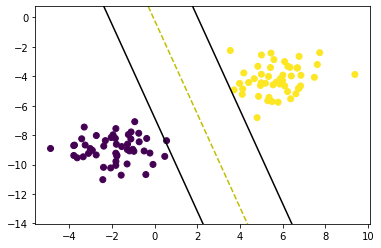

In [59]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y, verbose=1)

print(clf.w, clf.b)
visualize_svm(X, y, clf)

<a name='5.2' ></a>
### 5.2 Soft Margin by Gradient Descent

Loss at iteration 0: 2.9873191362208774e-05
Loss at iteration 50: 0.00036738620058293056
Loss at iteration 100: 0.000505374126975878
Loss at iteration 150: 0.0005803647647793129
Loss at iteration 200: 0.0006601508949804827
Loss at iteration 250: 0.0007446571435896224
[1.25029846 0.31818442] -0.45600000000000035


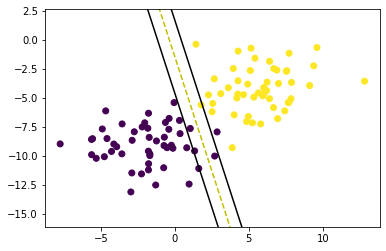

In [42]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y, verbose=1)

print(clf.w, clf.b)
visualize_svm(X, y, clf)

So, in this section, we solved SVMs using gradient descent; in the following notebook, we will solve SVMs using the dual problem by Lagrange method.

<a name='6' ></a>
## 6. Reference

- [https://en.wikipedia.org/wiki/Support_vector_machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [https://machinelearningcoban.com/2017/04/09/smv/](https://machinelearningcoban.com/2017/04/09/smv/)
- [https://machinelearningcoban.com/2017/04/13/softmarginsmv/](https://machinelearningcoban.com/2017/04/13/softmarginsmv/)
- [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)
- [Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow (Page 177-189)](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)
- [https://www.python-engineer.com/courses/mlfromscratch/07_svm/](https://www.python-engineer.com/courses/mlfromscratch/07_svm/)
- [https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)